In [1]:
import sys
import pandas as pd
import numpy as np

from pathlib import Path
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from autogluon.tabular import TabularPredictor

from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd


PROJECT_PATH = Path("C:/Users/barto/Desktop/Studia/ASI/Projekt/ASI.Backend/asibackend/")
SRC_PATH = PROJECT_PATH / "src"


sys.path.append(str(SRC_PATH))


from kedro.framework.project import configure_project
from kedro.framework.session import KedroSession

configure_project("asibackend")
session = KedroSession.create(project_path=PROJECT_PATH)
context = session.load_context()


c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[06/11/25 20:26:34] INFO     Using                                                                  ]8;id=289932;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\framework\project\__init__.py\__init__.py]8;;\:]8;id=268399;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\framework\project\__init__.py#272\272]8;;\
                             'c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packa                
                             ges\kedro\framework\project\rich_logging.yml' as logging                              
                             configuration.                                                                        

In [5]:
df = context.catalog.load("hr_dataset")

dupa = df

[06/11/25 20:27:43] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=986518;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py\plugin.py]8;;\:]8;id=150177;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro_telemetry\plugin.py#233\233]8;;\
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Loading data from hr_dataset (CSVDataset)...                       ]8;id=665742;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=966602;file://c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\kedro\io\data_catalog.py#403\403]8;;\

<Axes: >

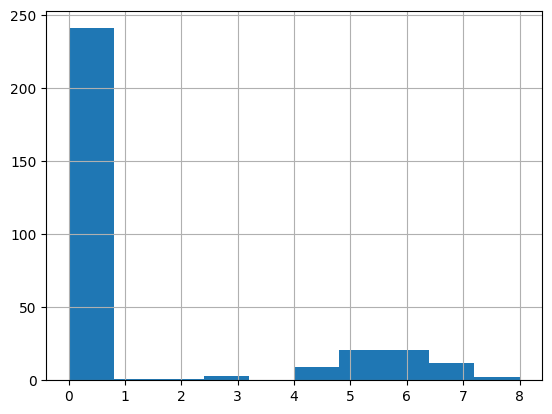

In [9]:


# df['SpecialProjectsCount'].hist()

robustScaler = RobustScaler()
# daysLateLast30Scaled = df['SpecialProjectsCount'].values.reshape(-1, 1)
df['SpecialProjectsCount'] = robustScaler.fit_transform(df['SpecialProjectsCount'])

df['SpecialProjectsCount'].hist()

In [4]:
df = df.drop(columns=[
   "Employee_Name",
   "EmpID",
   "MarriedID",
   "PositionID",
   "MaritalStatusID",
   "LastPerformanceReview_Date",
   "RecruitmentSource",
   "ManagerName",
   "DateofTermination",
   "RaceDesc",
   "CitizenDesc",
   "MaritalDesc",
   "HispanicLatino",
   "Sex",
   "DOB",
   "Zip",
   "State",
   "Termd",
   "FromDiversityJobFairID",
   "PerfScoreID",
   "EmpStatusID",
   "GenderID",
   "DeptID",
   "ManagerID",
   "SpecialProjectsCount",
   "EmploymentStatus",
   "TermReason",
   "Position"
], errors="ignore")


powerTransformer = PowerTransformer(method='yeo-johnson')
salary_reshaped = df['Salary'].values.reshape(-1, 1)
df['Salary'] = powerTransformer.fit_transform(salary_reshaped)

minMaxScaler = MinMaxScaler()
engagementSurveyScaled = df['EngagementSurvey'].values.reshape(-1, 1)
df['EngagementSurvey'] = minMaxScaler.fit_transform(engagementSurveyScaled)

standardScaler = StandardScaler()
absencesScaled = df['Absences'].values.reshape(-1, 1)
df['Absences'] = standardScaler.fit_transform(absencesScaled)

robustScaler = RobustScaler()
daysLateLast30Scaled = df['DaysLateLast30'].values.reshape(-1, 1)
df['DaysLateLast30'] = robustScaler.fit_transform(daysLateLast30Scaled)

# df['EngagementSurvey'].hist()
# df['EmpSatisfaction']
# df['DaysLateLast30'].hist()
# df['Absences'].hist()


X = dupa.drop(columns=["Salary", "DateofHire", "LastPerformanceReview_Date", 'DateofTermination', 'ManagerID'], errors="ignore")
Y = dupa['Salary']

X = X.select_dtypes(exclude=['object'])

print(X.isnull().sum())

selector = SelectKBest(score_func=f_regression, k=16)

# Dopasuj selektor do danych
X_new = selector.fit_transform(X, Y)

# Zobacz które cechy zostały wybrane
mask = selector.get_support()  # tablica boolowska

selected_features = X.columns[mask]
print("Wybrane cechy:", selected_features)



EmpID                     0
MarriedID                 0
MaritalStatusID           0
GenderID                  0
EmpStatusID               0
DeptID                    0
PerfScoreID               0
FromDiversityJobFairID    0
Termd                     0
PositionID                0
Zip                       0
EngagementSurvey          0
EmpSatisfaction           0
SpecialProjectsCount      0
DaysLateLast30            0
Absences                  0
dtype: int64
Wybrane cechy: Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Termd',
       'PositionID', 'Zip', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\bas │
│ e.py:3805 in get_loc                                                                             │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'SpecialProjectsCount'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:73                                                                                   │
│                                                                                                  │
│   70 selected_features = X.columns[mask]                                                         │
│   71 print("Wybrane cechy:", selected_features)                                                  │
│   72                                                                                             │
│ ❱ 73 df['SpecialProjectsCount'].hist()                                                           │
│   74                                                                                             │
│                                                                                                  │
│ c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\frame.py:41 │
│ 02 in __getitem__                                                                                │
│                                                                                                  │
│ c:\Users\barto\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\bas │
│ e.py:3812 in get_loc                                                                             │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'SpecialProjectsCount'